### Library

In [1]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### API KEY Setting

In [2]:
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
DATE = '20200115'
REQUEST_TYPE = '&data=AP01'

### API Requset

In [3]:
response = requests.get(HTTP + API_KEY + '&searchdate=' + DATE + REQUEST_TYPE)
data = json.loads(response.text)

### 환율코드 / 국가명 / 매매기준율

In [4]:
for cnt in data : 
    print(cnt['cur_unit'], cnt['cur_nm'], cnt['deal_bas_r'])

AED 아랍에미리트 디르함 313.93
AUD 호주 달러 795.81
BHD 바레인 디나르 3,058.54
BND 브루나이 달러 855.96
CAD 캐나다 달러 882.76
CHF 스위스 프랑 1,191.96
CNH 위안화 167.71
DKK 덴마아크 크로네 171.7
EUR 유로 1,283.11
GBP 영국 파운드 1,501.34
HKD 홍콩 달러 148.28
IDR(100) 인도네시아 루피아 8.44
JPY(100) 일본 옌 1,048.42
KRW 한국 원 1
KWD 쿠웨이트 디나르 3,800.47
MYR 말레이지아 링기트 283
NOK 노르웨이 크로네 129.91
NZD 뉴질랜드 달러 762.66
SAR 사우디 리얄 307.35
SEK 스웨덴 크로나 121.83
SGD 싱가포르 달러 855.96
THB 태국 바트 38.09
USD 미국 달러 1,153.1


### 현재일 환율

In [5]:
# date setting and request
DATE = '20200116'
response = requests.get(HTTP + API_KEY + '&searchdate=' + DATE + REQUEST_TYPE)
data = json.loads(response.text)

# result
RESULT = pd.DataFrame()
index = 0

for i in data : 
    RESULT = RESULT.append(pd.DataFrame({'국가명' : i['cur_nm'], '전신환(송금)받으실때' : i['ttb'],\
                                         '전신환(송금)보내실때' : i['tts'], '매매 기준율' : i['deal_bas_r'],\
                                         '장부가격' : i['bkpr'], '년환가료율' : i['yy_efee_r'],\
                                         '10일환가료율' : i['ten_dd_efee_r'],\
                                         '서울외국환중계매매기준율' : i['kftc_deal_bas_r'],\
                                         '서울외국환중계장부가격' : i['kftc_bkpr']}, index=[i['cur_unit']]))
RESULT

,국가명,전신환(송금)받으실때,전신환(송금)보내실때,매매 기준율,장부가격,년환가료율,10일환가료율,서울외국환중계매매기준율,서울외국환중계장부가격
AED,아랍에미리트 디르함,312.32,318.63,315.48,315,0,0,315.48,315
AUD,호주 달러,791.98,807.97,799.98,799,0,0,799.98,799
BHD,바레인 디나르,"3,042.92","3,104.39","3,073.66","3,073",0,0,"3,073.66","3,073"
BND,브루나이 달러,852.25,869.46,860.86,860,0,0,860.86,860
CAD,캐나다 달러,879.56,897.33,888.45,888,0,0,888.45,888
CHF,스위스 프랑,"1,190.29","1,214.34","1,202.32","1,202",0,0,"1,202.32","1,202"
CNH,위안화,166.32,169.68,168,168,0,0,168,168
DKK,덴마아크 크로네,171.18,174.63,172.91,172,0,0,172.91,172
EUR,유로,"1,279.31","1,305.16","1,292.24","1,292",0,0,"1,292.24","1,292"
GBP,영국 파운드,"1,496.24","1,526.47","1,511.36","1,511",0,0,"1,511.36","1,511"


### USD (미국 달러)

In [6]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'USD' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'USD' : i['deal_bas_r']}, index=[date]))
            
# string to float
RESULT['USD'] = RESULT['USD'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_USD.csv')

2010-01-04 1161
2010-01-05 1147.3
2010-01-06 1141.4
2010-01-07 1132
2010-01-08 1134.1
2010-01-11 1121.3
2010-01-12 1123.3
2010-01-13 1127
2010-01-14 1123.1
2010-01-15 1122.2
2010-01-18 1128.4
2010-01-19 1123.4
2010-01-20 1128
2010-01-21 1137.9
2010-01-22 1148.7
2010-01-25 1148.7
2010-01-26 1143.3
2010-01-27 1160.5
2010-01-28 1161
2010-01-29 1159.1
2010-02-01 1160.5
2010-02-02 1158
2010-02-03 1151.6
2010-02-04 1153.3
2010-02-05 1171.5
2010-02-08 1172
2010-02-09 1168.5
2010-02-10 1156.3
2010-02-11 1157.1
2010-02-12 1156.5
2010-02-16 1153.6
2010-02-17 1143.5
2010-02-18 1145.5
2010-02-19 1156.1
2010-02-22 1151.9
2010-02-23 1148
2010-02-24 1157.4
2010-02-25 1156.5
2010-02-26 1159.8
2010-03-02 1153.4
2010-03-03 1146.3
2010-03-04 1143.8
2010-03-05 1142.3
2010-03-08 1134.2
2010-03-09 1134
2010-03-10 1133.9
2010-03-11 1127.7
2010-03-12 1132.2
2010-03-15 1133.5
2010-03-16 1135.1
2010-03-17 1130.7
2010-03-18 1130.7
2010-03-19 1133.4
2010-03-22 1136.3
2010-03-23 1134.6
2010-03-24 1135.4
2010-03-25

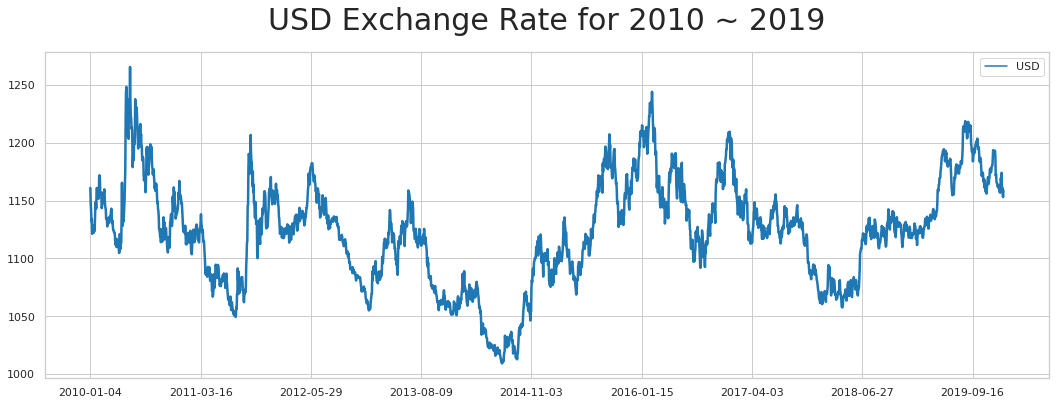

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
plt.figure(figsize = (18,6))
sns.set(style = 'whitegrid')
plot = sns.lineplot(data = RESULT, palette = 'tab10', linewidth=2.5)
plt.title('USD Exchange Rate for 2010 ~ 2019', fontsize = 30, position = (0.5, 1.0+0.05))
plot.set(xticks = RESULT.index[0::300])
plt.show()

### EUR (유로)

In [8]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'EUR' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'EUR' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['EUR'] = RESULT['EUR'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_EUR.csv')

2010-01-04 1673.46
2010-01-05 1665.97
2010-01-06 1643.96
2010-01-07 1639.52
2010-01-08 1621.38
2010-01-11 1633.47
2010-01-12 1625.56
2010-01-13 1628.85
2010-01-14 1634.41
2010-01-15 1627.16
2010-01-18 1612.58
2010-01-19 1623.75
2010-01-20 1605.39
2010-01-21 1597.34
2010-01-22 1602.27
2010-01-25 1628.14
2010-01-26 1625.8
2010-01-27 1619.91
2010-01-28 1626.81
2010-01-29 1614.59
2010-02-01 1605.43
2010-02-02 1626.98
2010-02-03 1620.2
2010-02-04 1600.58
2010-02-05 1583.54
2010-02-08 1599.94
2010-02-09 1601.24
2010-02-10 1609.09
2010-02-11 1591.19
2010-02-12 1584.01
2010-02-16 1570.32
2010-02-17 1586.74
2010-02-18 1554.47
2010-02-19 1546.66
2010-02-22 1575.07
2010-02-23 1563.22
2010-02-24 1552.37
2010-02-25 1565.76
2010-02-26 1569.23
2010-03-02 1574.04
2010-03-03 1569.06
2010-03-04 1571.53
2010-03-05 1552.77
2010-03-08 1558.12
2010-03-09 1544.38
2010-03-10 1543.54
2010-03-11 1546.42
2010-03-12 1547.89
2010-03-15 1556.79
2010-03-16 1550.89
2010-03-17 1560.54
2010-03-18 1551.26
2010-03-19 153

### JPY (일본 옌)

In [9]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'JPY(100)' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'JPY(100)' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['JPY(100)'] = RESULT['JPY(100)'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_JPY(100).csv')

2010-01-04 1256.5
2010-01-05 1250.96
2010-01-06 1248.35
2010-01-07 1232.35
2010-01-08 1211.91
2010-01-11 1223.96
2010-01-12 1216.58
2010-01-13 1234.23
2010-01-14 1232.05
2010-01-15 1230.24
2010-01-18 1236.8
2010-01-19 1243.13
2010-01-20 1234.21
2010-01-21 1240.88
2010-01-22 1261.78
2010-01-25 1277.6
2010-01-26 1272.75
2010-01-27 1284.75
2010-01-28 1289.08
2010-01-29 1287
2010-02-01 1284.13
2010-02-02 1287.26
2010-02-03 1283.3
2010-02-04 1267.2
2010-02-05 1291.85
2010-02-08 1312.49
2010-02-09 1313.91
2010-02-10 1299.4
2010-02-11 1287.13
2010-02-12 1289.46
2010-02-16 1282.72
2010-02-17 1277.38
2010-02-18 1252.96
2010-02-19 1246.47
2010-02-22 1262.94
2010-02-23 1259.85
2010-02-24 1272.93
2010-02-25 1282.06
2010-02-26 1299.31
2010-03-02 1301.18
2010-03-03 1298.38
2010-03-04 1295.67
2010-03-05 1283.08
2010-03-08 1262.05
2010-03-09 1255.97
2010-03-10 1261.54
2010-03-11 1250.77
2010-03-12 1247.45
2010-03-15 1248.11
2010-03-16 1253.48
2010-03-17 1254.72
2010-03-18 1249.72
2010-03-19 1251.16
20

### AED (아랍에미리트 디르함)

In [10]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'AED' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'AED' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['AED'] = RESULT['AED'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_AED.csv')

2010-01-04 317.89
2010-01-05 314.76
2010-01-06 311.54
2010-01-07 309.88
2010-01-08 308.5
2010-01-11 308.45
2010-01-12 304.87
2010-01-13 306.09
2010-01-14 306.67
2010-01-15 305.49
2010-01-18 305.79
2010-01-19 306.8
2010-01-20 306.1
2010-01-21 308.25
2010-01-22 309.96
2010-01-25 313.59
2010-01-26 312.84
2010-01-27 313.42
2010-01-28 315.81
2010-01-29 314.84
2010-02-01 315.24
2010-02-02 317.94
2010-02-03 315.84
2010-02-04 313.69
2010-02-05 313.99
2010-02-08 318.8
2010-02-09 319.24
2010-02-10 317.62
2010-02-11 315.24
2010-02-12 315.04
2010-02-16 314.43
2010-02-17 314.31
2010-02-18 311.11
2010-02-19 312.41
2010-02-22 315.2
2010-02-23 312.9
2010-02-24 312.68
2010-02-25 314.75
2010-02-26 315.38
2010-03-02 315.87
2010-03-03 313.83
2010-03-04 312.17
2010-03-05 311.42
2010-03-08 310.9
2010-03-09 308.65
2010-03-10 308.88
2010-03-11 308.41
2010-03-12 307.95
2010-03-15 307.93
2010-03-16 308.71
2010-03-17 308.7
2010-03-18 307.55
2010-03-19 308.03
2010-03-22 308.42
2010-03-23 309.44
2010-03-24 308.82


### AUD (호주 달러)

In [11]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'AUD' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'AUD' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['AUD'] = RESULT['AUD'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_AUD.csv')

2010-01-04 1050.37
2010-01-05 1054.51
2010-01-06 1043.72
2010-01-07 1046.4
2010-01-08 1039.54
2010-01-11 1051.73
2010-01-12 1040.8
2010-01-13 1035.44
2010-01-14 1040.57
2010-01-15 1044.96
2010-01-18 1034.58
2010-01-19 1043.96
2010-01-20 1036.38
2010-01-21 1031.41
2010-01-22 1025.73
2010-01-25 1038.37
2010-01-26 1039.02
2010-01-27 1035.1
2010-01-28 1039.98
2010-01-29 1032.35
2010-02-01 1022.66
2010-02-02 1041.91
2010-02-03 1028.02
2010-02-04 1014.63
2010-02-05 1000.72
2010-02-08 1016.37
2010-02-09 1012.36
2010-02-10 1024.68
2010-02-11 1013.74
2010-02-12 1030.22
2010-02-16 1026.48
2010-02-17 1039.11
2010-02-18 1026.72
2010-02-19 1022.37
2010-02-22 1041.27
2010-02-23 1034.43
2010-02-24 1024.4
2010-02-25 1032.69
2010-02-26 1028.72
2010-03-02 1045.46
2010-03-03 1041.98
2010-03-04 1038.3
2010-03-05 1028.39
2010-03-08 1039.3
2010-03-09 1029.57
2010-03-10 1038.75
2010-03-11 1037.1
2010-03-12 1035.77
2010-03-15 1037.61
2010-03-16 1035.36
2010-03-17 1041.98
2010-03-18 1042.87
2010-03-19 1041.25


### BHD (바레인 디나르)

In [12]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'BHD' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'BHD' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['BHD'] = RESULT['BHD'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_BHD.csv')

2010-01-04 3097.08
2010-01-05 3066.76
2010-01-06 3035.36
2010-01-07 3019.02
2010-01-08 3005.92
2010-01-11 3005.04
2010-01-12 2970.21
2010-01-13 2982.04
2010-01-14 2987.8
2010-01-15 2976.39
2010-01-18 2979.31
2010-01-19 2989.05
2010-01-20 2982.23
2010-01-21 3003.53
2010-01-22 3019.89
2010-01-25 3050.66
2010-01-26 3048.01
2010-01-27 3053.66
2010-01-28 3075.33
2010-01-29 3067.72
2010-02-01 3071.27
2010-02-02 3097.53
2010-02-03 3077.11
2010-02-04 3056.15
2010-02-05 3059.15
2010-02-08 3106.1
2010-02-09 3110.26
2010-02-10 3094.35
2010-02-11 3071.19
2010-02-12 3069.23
2010-02-16 3063.23
2010-02-17 3058.09
2010-02-18 3031.11
2010-02-19 3043.93
2010-02-22 3071.09
2010-02-23 3048.54
2010-02-24 3046.5
2010-02-25 3066.66
2010-02-26 3072.76
2010-03-02 3077.54
2010-03-03 3057.56
2010-03-04 3041.46
2010-03-05 3033.95
2010-03-08 3028.91
2010-03-09 3007.08
2010-03-10 3009.36
2010-03-11 3004.59
2010-03-12 3000.08
2010-03-15 3000.27
2010-03-16 3007.69
2010-03-17 3006.92
2010-03-18 2995.78
2010-03-19 3000

### BND (브루나이 달러)

In [13]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'BND' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'BND' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['BND'] = RESULT['BND'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_BND.csv')

2019-12-13 878.65
2019-12-16 864.76
2019-12-17 865.45
2019-12-18 860.75
2019-12-19 859.78
2019-12-20 859.47
2019-12-23 857.79
2019-12-24 857.79
2019-12-26 858.88
2019-12-27 857.64
2019-12-30 858.37
2019-12-31 858.55
2020-01-02 860.88
2020-01-03 858.65
2020-01-06 860.91
2020-01-07 867.01
2020-01-08 862.83
2020-01-09 869.12
2020-01-10 858.46
2020-01-13 861.16
2020-01-14 858.3
2020-01-15 855.96
2020-01-16 860.86


### CAD (캐나다 달러)

In [14]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'CAD' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'CAD' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['CAD'] = RESULT['CAD'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_CAD.csv')

2010-01-04 1110.15
2010-01-05 1109.76
2010-01-06 1101.19
2010-01-07 1102.69
2010-01-08 1095.51
2010-01-11 1099.37
2010-01-12 1083.4
2010-01-13 1081.9
2010-01-14 1092.96
2010-01-15 1096.28
2010-01-18 1090.75
2010-01-19 1098.66
2010-01-20 1090.07
2010-01-21 1082.66
2010-01-22 1082.33
2010-01-25 1088.75
2010-01-26 1086.98
2010-01-27 1083.13
2010-01-28 1090.12
2010-01-29 1084.13
2010-02-01 1082.81
2010-02-02 1100.92
2010-02-03 1096.87
2010-02-04 1084.63
2010-02-05 1075.29
2010-02-08 1094.39
2010-02-09 1089.98
2010-02-10 1093.04
2010-02-11 1089.89
2010-02-12 1102
2010-02-16 1100.53
2010-02-17 1104.15
2010-02-18 1092.19
2010-02-19 1091.35
2010-02-22 1113.97
2010-02-23 1102.39
2010-02-24 1088.01
2010-02-25 1097.34
2010-02-26 1092.42
2010-03-02 1114.29
2010-03-03 1112.75
2010-03-04 1111.69
2010-03-05 1109.62
2010-03-08 1111.77
2010-03-09 1102.66
2010-03-10 1105.43
2010-03-11 1105.45
2010-03-12 1104.76
2010-03-15 1111.76
2010-03-16 1112.43
2010-03-17 1118.16
2010-03-18 1117.71
2010-03-19 1116.2

### CHF (스위스 프랑)

In [15]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'CHF' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'CHF' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['CHF'] = RESULT['CHF'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_CHF.csv')

2010-01-04 1128.17
2010-01-05 1122.31
2010-01-06 1106.67
2010-01-07 1107.41
2010-01-08 1095.46
2010-01-11 1106.62
2010-01-12 1102.44
2010-01-13 1103.78
2010-01-14 1106.1
2010-01-15 1101.5
2010-01-18 1093.14
2010-01-19 1100.92
2010-01-20 1088.38
2010-01-21 1084.37
2010-01-22 1090.99
2010-01-25 1105.07
2010-01-26 1105.06
2010-01-27 1099.94
2010-01-28 1104.93
2010-01-29 1098.6
2010-02-01 1090.87
2010-02-02 1105.61
2010-02-03 1099.57
2010-02-04 1088.32
2010-02-05 1081.18
2010-02-08 1089.2
2010-02-09 1093.03
2010-02-10 1096.33
2010-02-11 1085.5
2010-02-12 1080.69
2010-02-16 1071.63
2010-02-17 1081.06
2010-02-18 1059.53
2010-02-19 1055.75
2010-02-22 1075.07
2010-02-23 1068.17
2010-02-24 1060.28
2010-02-25 1069.62
2010-02-26 1072.39
2010-03-02 1075.55
2010-03-03 1072.08
2010-03-04 1073.9
2010-03-05 1061.58
2010-03-08 1064.76
2010-03-09 1055.49
2010-03-10 1055.64
2010-03-11 1058.35
2010-03-12 1058.94
2010-03-15 1068.18
2010-03-16 1067.7
2010-03-17 1074.19
2010-03-18 1070.82
2010-03-19 1069.94


### CNH : 위안화

In [16]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'CNH' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'CNH' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['CNH'] = RESULT['CNH'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_CNH.csv')

2016-01-04 177.84
2016-01-05 179.19
2016-01-06 178.97
2016-01-07 179.05
2016-01-08 179.04
2016-01-11 179.13
2016-01-12 180.91
2016-01-13 183.05
2016-01-14 183.52
2016-01-15 183.84
2016-01-18 183.09
2016-01-19 184.24
2016-01-20 183.43
2016-01-21 183.57
2016-01-22 183.09
2016-01-25 182.23
2016-01-26 180.77
2016-01-27 181.6
2016-01-28 181.6
2016-01-29 182.78
2016-02-01 182.44
2016-02-02 182.57
2016-02-03 181.86
2016-02-04 183.37
2016-02-05 181.83
2016-02-11 181.73
2016-02-12 182.78
2016-02-15 184.5
2016-02-16 185.85
2016-02-17 186.89
2016-02-18 187.56
2016-02-19 187.87
2016-02-22 189.23
2016-02-23 189.01
2016-02-24 188.31
2016-02-25 188.92
2016-02-26 189.08
2016-02-29 189
2016-03-02 189.53
2016-03-03 188.31
2016-03-04 186.27
2016-03-07 185.41
2016-03-08 184.6
2016-03-09 185.17
2016-03-10 186.36
2016-03-11 185.39
2016-03-14 184.88
2016-03-15 182.88
2016-03-16 182.98
2016-03-17 183.04
2016-03-18 180.83
2016-03-21 179.76
2016-03-22 179.95
2016-03-23 178.84
2016-03-24 178.27
2016-03-25 179.19

### DKK (덴마아크 크로네)

In [ ]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'DKK' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'DKK' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['DKK'] = RESULT['DKK'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_DKK.csv')

### GBP (영국 파운드)

In [ ]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'GBP' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'GBP' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['GBP'] = RESULT['GBP'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_GBP.csv')

### HKD	(홍콩 달러)

In [ ]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'HKD' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'HKD' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['HKD'] = RESULT['HKD'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_HKD.csv')

### IDR (인도네시아 루피아)

In [ ]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'IDR(100)' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'IDR(100)' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['IDR(100)'] = RESULT['IDR(100)'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_IDR(100).csv')

### KWD	(쿠웨이트 디나르)

In [ ]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'KWD' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'KWD' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['KWD'] = RESULT['KWD'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_KWD.csv')

### MYR (말레이지아 링기트)

In [ ]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'MYR' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'MYR' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['MYR'] = RESULT['MYR'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_MYR.csv')

### NOK	(노르웨이 크로네)

In [ ]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'NOK' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'NOK' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['NOK'] = RESULT['NOK'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_NOK.csv')

### NZD	(뉴질랜드 달러)

In [ ]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'NZD' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'NZD' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['NZD'] = RESULT['NZD'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_NZD.csv')

### SAR (사우디 리얄)

In [ ]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'SAR' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'SAR' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['SAR'] = RESULT['SAR'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_SAR.csv')

### SEK	(스웨덴 크로나)

In [ ]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'SEK' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'SEK' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['SEK'] = RESULT['SEK'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_SEK.csv')

### SGD	(싱가포르 달러)

In [ ]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'SGD' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'SGD' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['SGD'] = RESULT['SGD'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_SGD.csv')

### THB	(태국 바트)

In [ ]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'SGD' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'THB' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['THB'] = RESULT['THB'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_THB.csv')